In [45]:
import pandas as pd 
import matplotlib.pyplot as plt

In [46]:
def loadData(path, nrows=None):
    return pd.read_csv(path, nrows=nrows)

In [47]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataLondonUTD19 = loadData(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19.csv", nrows=1000000)

In [48]:
dataframeLondonUTD19 = pd.DataFrame(dataLondonUTD19)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [49]:
# Drop the error column, because it is not needed
dataframeLondonUTD19 = dataframeLondonUTD19.drop(["error"], axis=1)
dataframeLondonUTD19 = dataframeLondonUTD19.drop(["speed"], axis=1)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london


In [50]:
# Make a new column with the day of the week
dataframeLondonUTD19['day'] = pd.to_datetime(dataframeLondonUTD19['day'])
dataframeLondonUTD19['weekday'] = dataframeLondonUTD19['day'].dt.day_name()
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday


In [51]:
#Calculate the speed using the formula speed = flow / occupancy
dataframeLondonUTD19['traffic'] = dataframeLondonUTD19['flow'] * dataframeLondonUTD19['occ']
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


In [52]:
#Filter the data for the EAST_N04/161x1 detector
#to test the speed calculation
dataframeEAST_N04 = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'EAST_N04/161x1']
dataframeEAST_N04.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


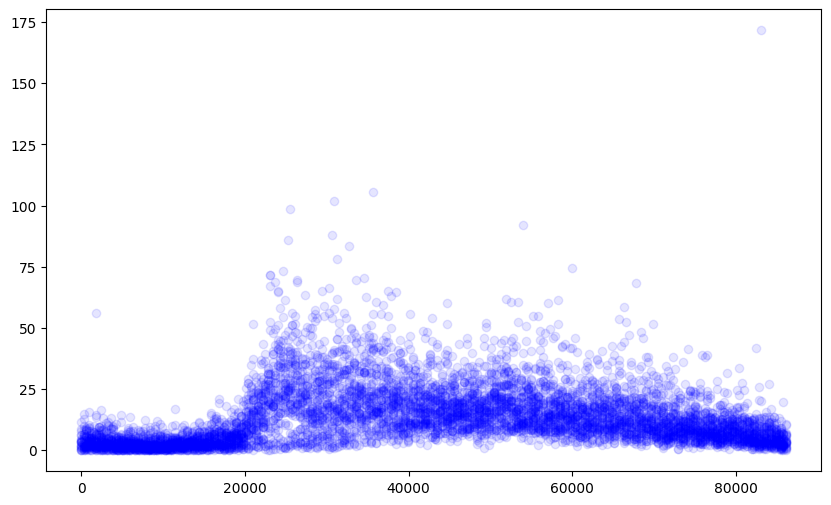

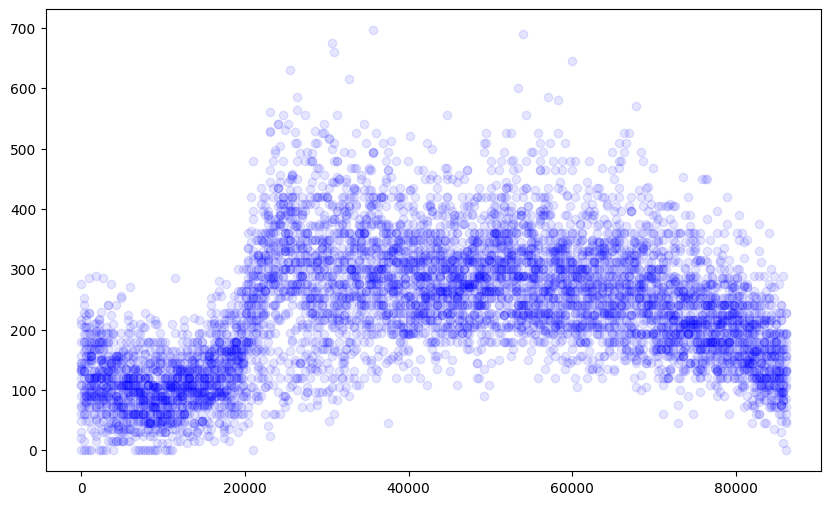

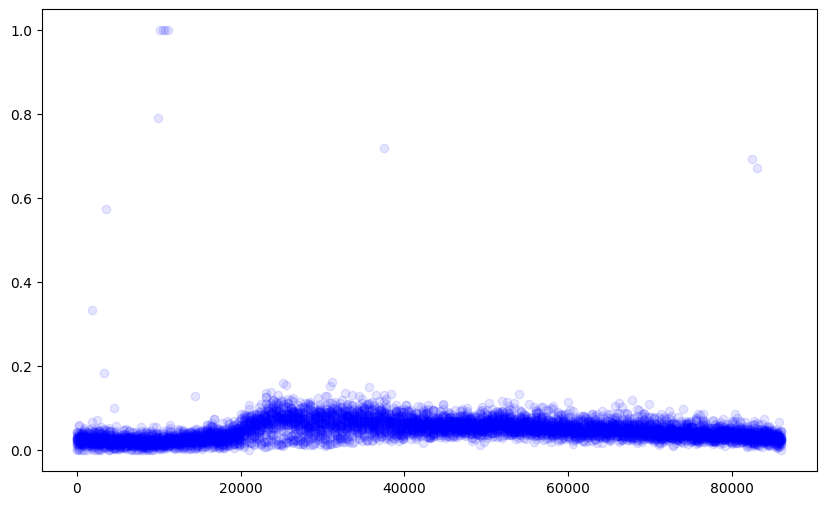

In [53]:
#Plot the speed of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()
#Plot the flow of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['flow'], alpha=0.1, color='blue')
plt.show()
#Plot the occupancy of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['occ'], alpha=0.1, color='blue')
plt.show()

In [54]:
dataframeEAST_N04Saturday = dataframeEAST_N04[dataframeEAST_N04['weekday'] == 'Saturday']
dataframeEAST_N04Saturday.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


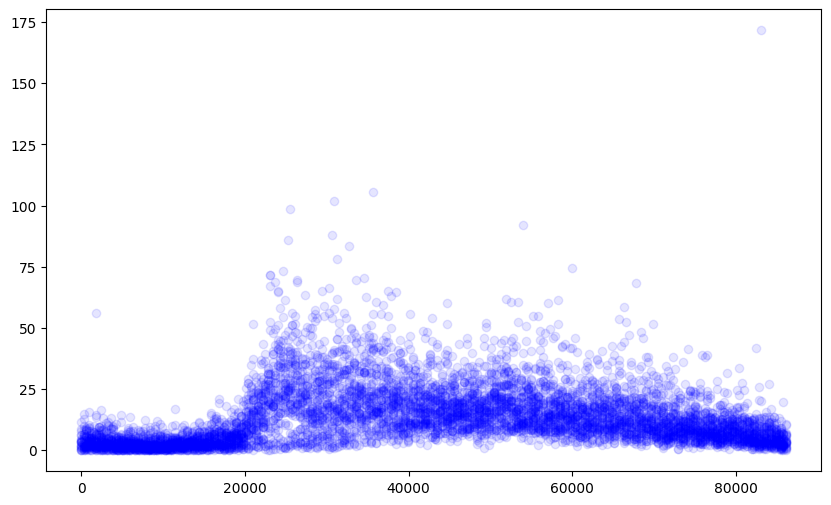

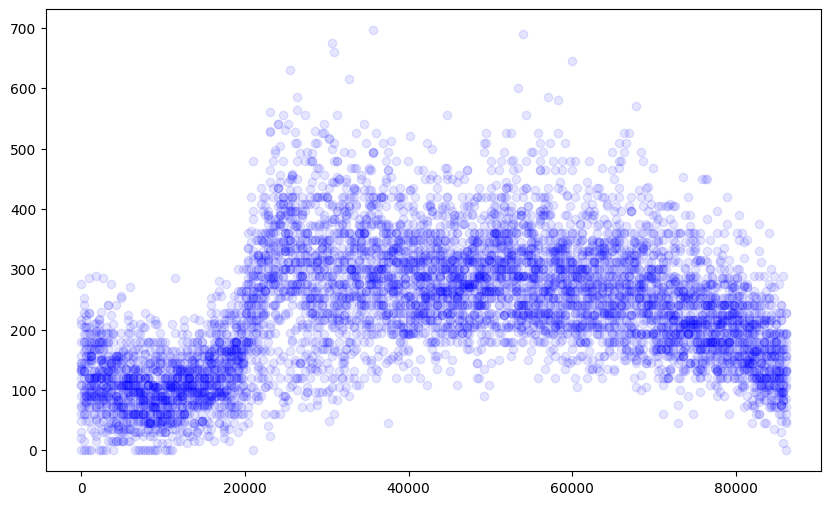

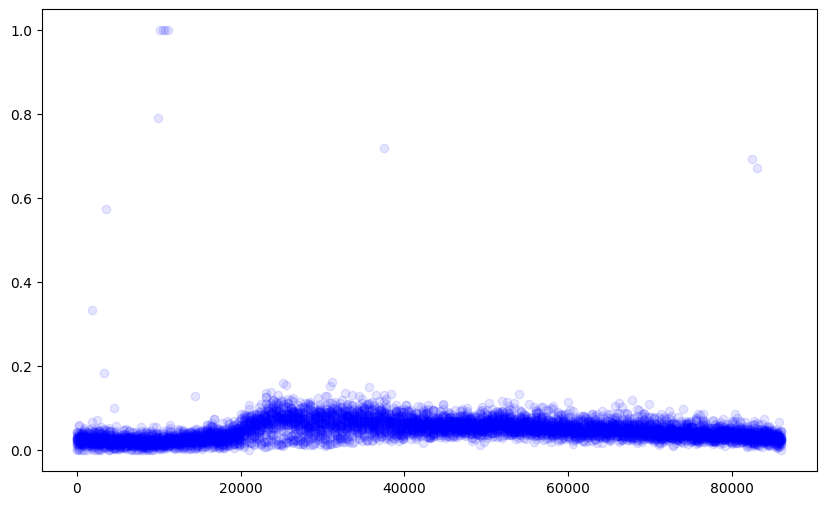

In [55]:
#Plot the speed of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()
#Plot the flow of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['flow'], alpha=0.1, color='blue')
plt.show()
#Plot the occupancy of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['occ'], alpha=0.1, color='blue')
plt.show()

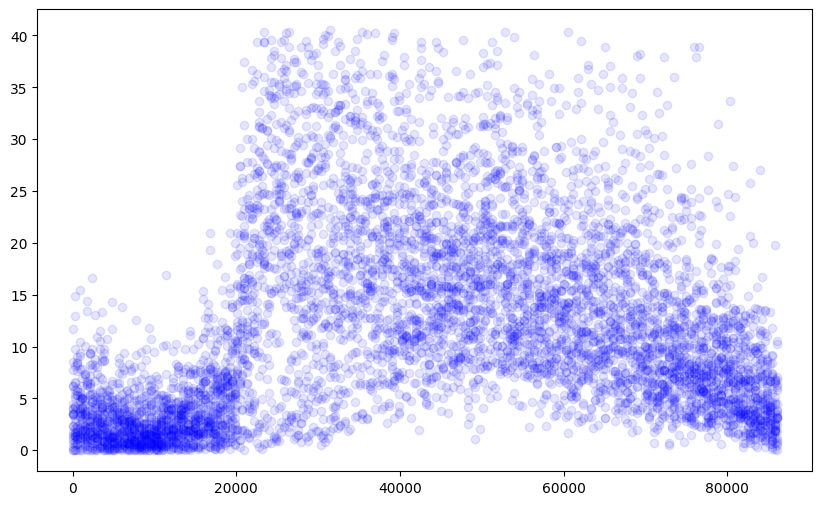

In [57]:
#Calculate lower and upper bound of the traffic
Q1 = dataframeEAST_N04['traffic'].quantile(0.25)
Q3 = dataframeEAST_N04['traffic'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
filtered_df = dataframeEAST_N04[(dataframeEAST_N04['traffic'] >= lower_bound) & (dataframeEAST_N04['traffic'] <= upper_bound)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['interval'], filtered_df['traffic'], alpha=0.1, color='blue')
plt.show()